In [27]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

In [21]:
import streamlit as st
print(f'Streamlit: {st.__version__}')
import sklearn as sk
print(f'Sklearn: {sk.__version__}')


Streamlit: 1.32.0
Sklearn: 1.4.2


In [22]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [23]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [25]:
X = df.copy()
X.drop("Outcome", axis=1, inplace=True)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
0,6,148,72,35,0,33.6,50
1,1,85,66,29,0,26.6,31
2,8,183,64,0,0,23.3,32
3,1,89,66,23,94,28.1,21
4,0,137,40,35,168,43.1,33


In [5]:
# Define target set
y = df["Outcome"]

In [6]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=100, random_state=78)

In [8]:
# Fit the model
rf_model = rf_model.fit(X_train, y_train)

In [9]:
# Evaluate the model
print(f'Training Score: {rf_model.score(X_train, y_train)}')
print(f'Testing Score: {rf_model.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.7604166666666666


In [10]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test)

probabilities = rf_model.predict_proba(X_test)

is_diabetic_probabilities = [m[1] for m in probabilities]
is_diabetic_probabilities

[0.52,
 0.02,
 0.0,
 0.12,
 0.17,
 0.69,
 0.89,
 0.72,
 0.89,
 0.18,
 0.3,
 0.71,
 0.0,
 0.05,
 0.07,
 0.9,
 0.16,
 0.37,
 0.1,
 0.31,
 0.44,
 0.12,
 0.03,
 0.0,
 0.31,
 0.0,
 0.85,
 0.77,
 0.64,
 0.16,
 0.07,
 0.18,
 0.09,
 0.03,
 0.58,
 0.29,
 0.43,
 0.03,
 0.02,
 0.46,
 0.16,
 0.02,
 0.64,
 0.79,
 0.61,
 0.01,
 0.78,
 0.19,
 0.16,
 0.36,
 0.02,
 0.71,
 0.08,
 0.48,
 0.53,
 0.03,
 0.26,
 0.24,
 0.08,
 0.0,
 0.69,
 0.05,
 0.44,
 0.36,
 0.82,
 0.09,
 0.35,
 0.07,
 0.54,
 0.45,
 0.0,
 0.0,
 0.16,
 0.03,
 0.07,
 0.13,
 0.1,
 0.46,
 0.07,
 0.0,
 0.58,
 0.72,
 0.35,
 0.3,
 0.29,
 0.01,
 0.14,
 0.15,
 0.22,
 0.03,
 0.22,
 0.14,
 0.1,
 0.17,
 0.12,
 0.55,
 0.82,
 0.48,
 0.88,
 0.16,
 0.65,
 0.5,
 0.59,
 0.32,
 0.35,
 0.18,
 0.08,
 0.94,
 0.45,
 0.06,
 0.54,
 0.0,
 0.48,
 0.95,
 0.35,
 0.55,
 0.16,
 0.12,
 0.76,
 0.65,
 0.07,
 0.08,
 0.36,
 0.79,
 0.14,
 0.0,
 0.15,
 0.04,
 0.34,
 0.06,
 0.6,
 0.11,
 0.59,
 0.33,
 0.12,
 0.06,
 0.17,
 0.3,
 0.57,
 0.01,
 0.18,
 0.2,
 0.32,
 0.36,
 0.03,
 0.37

In [11]:
results_df = pd.DataFrame({
    'Actuals': y_test,
    'Predictions': predictions,
    'Diabetic Probability': is_diabetic_probabilities
})
results_df.head(20)

,Actuals,Predictions,Diabetic Probability
533,0,1,0.52
62,0,0,0.02
421,0,0,0.00
751,0,0,0.12
577,1,0,0.17
64,1,1,0.69
622,0,1,0.89
498,1,1,0.72
732,1,1,0.89
9,1,0,0.18


In [12]:
sorted_results = results_df.sort_values(by='Diabetic Probability', ascending=False)
sorted_results

,Actuals,Predictions,Diabetic Probability
761,1,1,0.95
545,1,1,0.94
327,0,1,0.92
56,1,1,0.90
670,0,1,0.90
...,...,...,...
607,0,0,0.00
450,0,0,0.00
617,0,0,0.00
55,0,0,0.00


In [13]:
merged_df = pd.merge(sorted_results, X, left_index=True, right_index=True)
merged_df

,Actuals,Predictions,Diabetic Probability,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
761,1,1,0.95,9,170,74,31,0,44.0,43
545,1,1,0.94,8,186,90,35,225,34.5,37
327,0,1,0.92,10,179,70,0,0,35.1,37
56,1,1,0.90,7,187,68,39,304,37.7,41
670,0,1,0.90,6,165,68,26,168,33.6,49
...,...,...,...,...,...,...,...,...,...,...
607,0,0,0.00,1,92,62,25,41,19.5,25
450,0,0,0.00,1,82,64,13,95,21.2,23
617,0,0,0.00,2,68,62,13,15,20.1,23
55,0,0,0.00,1,73,50,10,0,23.0,21


In [14]:
# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7604166666666666

In [15]:
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.29749586283893187, 'Glucose'),
 (0.18628465650592776, 'BMI'),
 (0.15052278427563492, 'Age'),
 (0.10816243435286214, 'BloodPressure'),
 (0.09082923205978427, 'Pregnancies'),
 (0.08810337726343075, 'Insulin'),
 (0.07860165270342839, 'SkinThickness')]

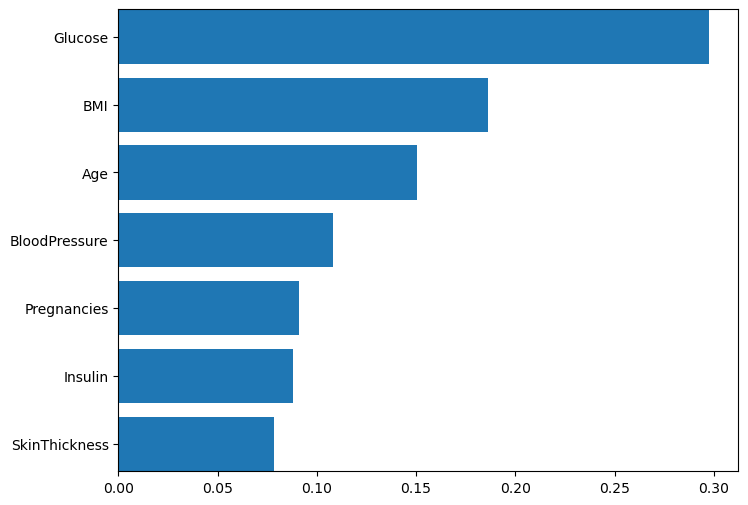

In [16]:
# Plot the feature importances
features = sorted(zip(X.columns, importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [17]:
filename = 'rf.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [30]:
gb_model = GradientBoostingClassifier(random_state=78)
gb_model = gb_model.fit(X_train, y_train)
print(f'Training Score: {gb_model.score(X_train, y_train)}')
print(f'Testing Score: {gb_model.score(X_test, y_test)}')
filename = 'gb.sav'
pickle.dump(gb_model, open(filename, 'wb'))

Training Score: 0.9288194444444444
Testing Score: 0.7552083333333334
